## Name: Franklin Limaico

# Homework 2: Exoplanets

The homework should be submitted as a python notebook. Make all the plots in the python notebook.

Please email the homework to hdenes@yachaytech.edu.ec by the <b>end of the day (midnight) by the 29th of November.</b>

Total points: 20

Please let me know if you have any questions. 

<b>Important notes: </b> 
- The tutorial notebooks contain the methods that you can use to solve the homework. 
- If you have problems with some of the specific astrophysics packages, make sure to check the versions. Not all versions of the packages are compatible with each other. 
- exercise 2 uses the lightkurve package which you should be able to install with pip. It works in google collab too. I have tested it. 


## 1. (15 points) Analysing properties of Exoplanets

The goal of this exercise is to analyse overall properties of exoplanets based on the data from the European exoplanet data base: http://exoplanet.eu/catalog/ Statistical studies of exoplanets and the properties of their host stars are critical for understanding planet formation.


1. Download the relevant data. You can do this by either downloading the full catalogue from the website or trough python using ADQL commands. 
2. Make sure that you only have relevant data for planets. For this, think about the definition of a planet and exclude all data that does not satisfy the definition. Briefly describe your decision about excluding irrelevant data.
3. Make a scatter plot of Semi-major axis vs. Calculated temperature. And make histograms of both Semi-major axis and temperature.
4. What can you conlcude from the plots in #3? Is there a relation between the two parameters? Briefly explain what is the reason for the relation if there is one? 
5. Make a scatter plot of Effective temperature of the host star vs. planetary mass. Make histograms of both quantities. 
6. Describe the plots that you created in #5. What can you conclude from these plots? Brielfy explain your conclusions. 
7. In class we discussed that planets, in particular gas giants, are more common around metall rich stars. Can you show some evidence for this using histograms, scatter plots and number counts? Tip: You may want to select specific data for this.
8. Briefly explain and describe what you found based on the plots in #7. 
9. Make a scatter plot of mass vs. radius. Make sure to have both axes in log scale. 
10. There is a known gap in the radius of planets. Can you find where this gap is in the plot from #9? Is there also a gap in the mass of planets? What does this suggest? 
11. Is there anything else that you can conclude from #9? Mark where the gap is, you can use a square or a circle on the figure. Briefly explain your observation. 
12. Calcualte the density of the exoplanets and make a histogram. Compare the histogram with the density of Earth and Jupiter. What do you find?
13. Where are planets found? Plot the on sky position (R.A. and Dec) of all known exoplanets. What can you conclude from this. 
14. Plot histograms of the host stars distance, mass and temperature. 
15. What can you conclude from the plots in #13? Are these conclusions physically meaningfull or the result of some bias? 

Tips: 
- Some plots show information better on a log scale and some show information better on a linear scale. Make sure that you choose the scale of the axes of your plots appropriately. 
- Make sure to choose the bin size for histograms well. The goal is to have equally sized bins and to be able to see the shape of the distribution. 

# Solution:

**1. Download the relevant data. You can do this by either downloading the full catalogue from the website or trough python using ADQL commands.**

**Source: Exoplanets.ipynb**


In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
from astropy import units as u
from reproject import reproject_interp
import csv
from astropy.io import ascii
import pandas as pd


In [2]:
data = pd.read_csv('exoplanet.eu_catalog.csv')

In [3]:
#data.keys()
data

,name,planet_status,mass,mass_error_min,mass_error_max,mass_sini,mass_sini_error_min,mass_sini_error_max,radius,radius_error_min,...,star_sp_type,star_age,star_age_error_min,star_age_error_max,star_teff,star_teff_error_min,star_teff_error_max,star_detected_disc,star_magnetic_field,star_alternate_names
0,11 Com b,Confirmed,16.1284,1.53491,1.53491,16.1284,1.53491,1.53491,NaN,NaN,...,G8 III,NaN,NaN,NaN,4742.0,100.0,100.0,NaN,NaN,NaN
1,11 Oph b,Confirmed,21.0000,3.00000,3.00000,NaN,NaN,NaN,NaN,NaN,...,M9,0.011,0.002,0.002,2375.0,175.0,175.0,NaN,NaN,"Oph 1622-2405, Oph 11A"
2,11 UMi b,Confirmed,11.0873,1.10000,1.10000,11.0873,1.10000,1.10000,NaN,NaN,...,K4III,1.560,0.540,0.540,4340.0,70.0,70.0,NaN,NaN,NaN
3,14 And b,Confirmed,4.6840,0.23000,0.23000,4.6840,0.23000,0.23000,NaN,NaN,...,K0III,NaN,NaN,NaN,4813.0,20.0,20.0,NaN,NaN,NaN
4,14 Her b,Confirmed,NaN,NaN,NaN,NaN,4.95000,4.95000,NaN,NaN,...,K0 V,5.100,NaN,NaN,5311.0,87.0,87.0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,ZTFJ0220+21 b,Confirmed,14.0000,6.00000,6.00000,NaN,NaN,NaN,0.54,0.07,...,WD,NaN,NaN,NaN,14200.0,1000.0,1000.0,NaN,NaN,NaN
5539,ZTFJ0407-00 b,Confirmed,19.0000,3.00000,3.00000,NaN,NaN,NaN,0.44,0.02,...,WD,NaN,NaN,NaN,17400.0,1200.0,1200.0,NaN,NaN,NaN
5540,ZTF-J1622+47 b,Confirmed,61.0000,19.00000,19.00000,NaN,NaN,NaN,0.98,0.02,...,NaN,NaN,NaN,NaN,29000.0,NaN,NaN,NaN,NaN,NaN
5541,ZTFJ1637+49 b,Confirmed,23.0000,8.00000,8.00000,NaN,NaN,NaN,0.68,0.07,...,WD,NaN,NaN,NaN,11200.0,300.0,300.0,NaN,NaN,NaN


**2. Make sure that you only have relevant data for planets. For this, think about the definition of a planet and exclude all data that does not satisfy the definition. Briefly describe your decision about excluding irrelevant data.**


We use the mass to isolate the relevant data.

How to isolate the data?

**3. Make a scatter plot of Semi-major axis vs. Calculated temperature. And make histograms of both Semi-major axis and temperature.**

In the plot, Semi-major axis is the y_axis and Calculated temperature is the x_axis.

**How to find the line represented by the Earth?**



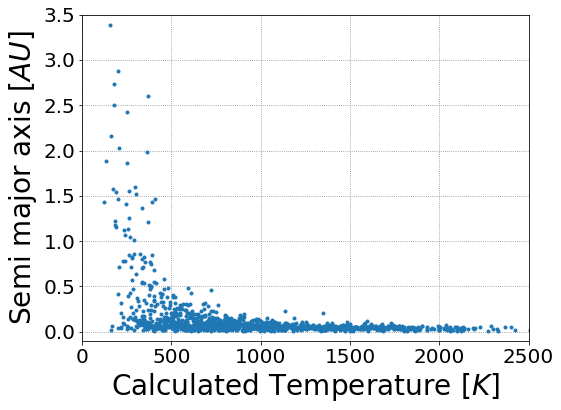

In [4]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['temp_calculated'], data['semi_major_axis'], marker = '.', linestyle='')
plt.xlabel("Calculated Temperature [$K$]", fontsize=28)
plt.ylabel('Semi major axis [$AU$]', fontsize=28)

plt.xlim(0.00,2500)
plt.ylim(-0.1,3.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

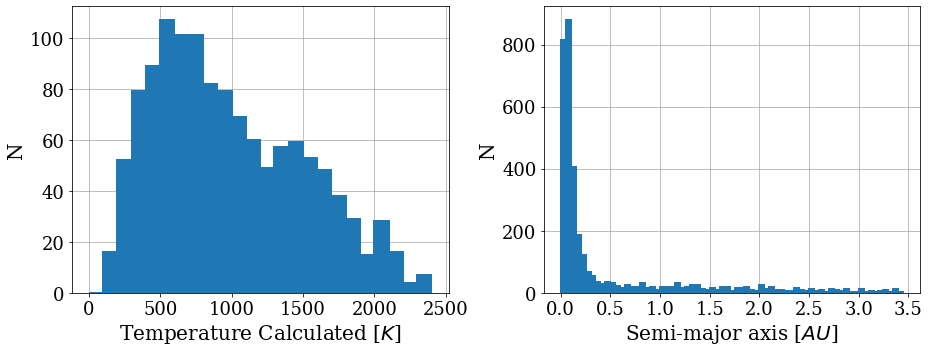

In [5]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data['temp_calculated']
bin_size = np.arange(0,2500,100) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('Temperature Calculated [$K$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
#plt.legend()
#plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = data['semi_major_axis']
bin_size = np.arange(0,3.5, 0.05) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('Semi-major axis [$AU$]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
#plt.legend()
plt.grid(True)
#plt.xlim(0.00,2)
plt.tight_layout()

plt.show()

**4. What can you conlcude from the plots in #3? Is there a relation between the two parameters? Briefly explain what is the reason for the relation if there is one?** 


As we know, the Semi Major Axis is related with the larger distance between the planet and their parent star. On the other hand, temperature calculated is related with the mean temperature of the envelope and the atmosphere of the planet. 

As we can observe, the most of the planets has a semi-major axis less than 0.5 AU, also the most of planets reach temperatures around 10 000 K. The reason is related with the distance between it and the parent star. When planets are near to a star, they tend to have high temperatures due to the high proximity to the star. Also, as we discuss in class, the envelope temperatures around 10 000 K is mainly related to planets with distances $\sim 0.1$ $AU$ [1].

[1] Source: Ast_obj_4.2. Page 32

**5. Make a scatter plot of Effective temperature of the host star vs. planetary mass. Make histograms of both quantities.**

In [6]:
#data.keys()

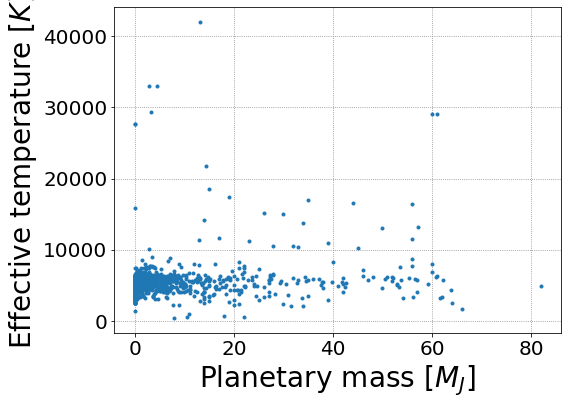

In [7]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['star_teff'], marker = '.', linestyle='')
plt.xlabel("Planetary mass [$M_J$]", fontsize=28)
plt.ylabel('Effective temperature [$K$]', fontsize=28)

#plt.xlim(0.00,13)
#plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

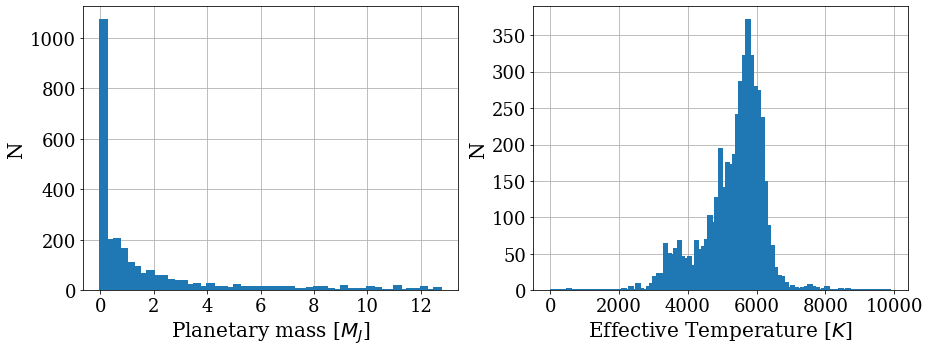

In [8]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data['mass']
bin_size = np.arange(0,13,0.25) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('Planetary mass [$M_J$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
#plt.legend()
#plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = data['star_teff']
bin_size = np.arange(0,10000, 100) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('Effective Temperature [$K$]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
#plt.legend()
plt.grid(True)
#plt.xlim(0.00,2)
plt.tight_layout()

plt.show()

**6. Describe the plots that you created in #5. What can you conclude from these plots? Brielfy explain your conclusions.** 


In the Scatter Plot, it is possible to observe a concentration at the first cell i.e. $[0,20]$ $M_J$ in plantary mass and $[0,10000]$ $K$ in Effective Temperature. The concentratation is correlated and is more detailed with the Histogram. The Planteary Mass Histogram shows a concentration in $[0,2]$ $M_J$ with the peak at $0.1$ $M_J$ while something similar happening for the Effetive Temperature with a concentration in $[4000, 8000]$ $K$ and the peak at $6000$ $K$.

We can conclude relationship between the planet existence and the Star Temperature. In fatc,a planet are more like to be (formed) around stars of $6000$ $K$ of Temperature. This statement proof the fact that most of the Exoplanets orbit stars similar to the Sun.

**7. In class we discussed that planets, in particular gas giants, are more common around metall rich stars. Can you show some evidence for this using histograms, scatter plots and number counts? Tip: You may want to select specific data for this.**


In [9]:
#data.keys()

In [10]:
#data["star_metallicity"]

Make an scatter plot of Planetary Mass vs. Star Metallicity

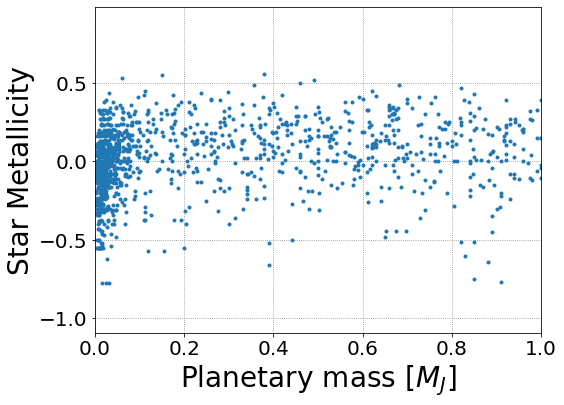

In [11]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['mass'], data['star_metallicity'], marker = '.', linestyle='')
plt.xlabel("Planetary mass [$M_J$]", fontsize=28)
plt.ylabel('Star Metallicity', fontsize=28)

plt.xlim(0.00,1)
#plt.ylim(0,2.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

Make Histograms for Star Metallicity and Planetary Mass

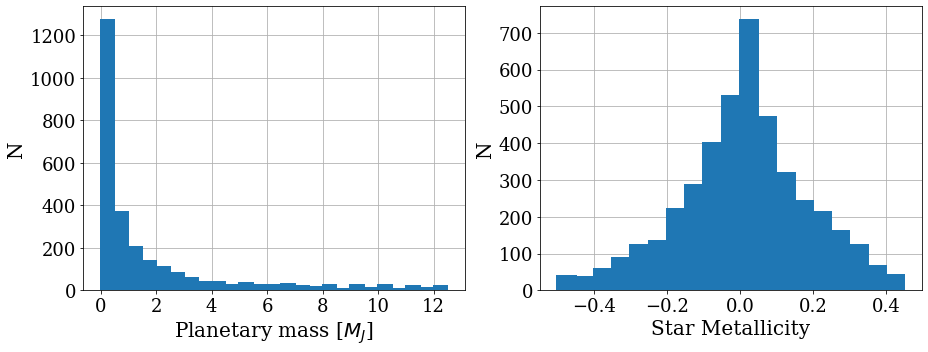

In [12]:
fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,2,1)
d = data['mass']
bin_size = np.arange(0,13,0.5) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('Planetary mass [$M_J$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
#plt.legend()
#plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,2,2)
d = data['star_metallicity']
bin_size = np.arange(-0.5,0.5, 0.05) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('Star Metallicity', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
#plt.legend()
plt.grid(True)
#plt.xlim(0.00,2)
plt.tight_layout()

plt.show()

**8. Briefly explain and describe what you found based on the plots in #7.**


It can be observed that there is a concentration around high metallicity stars. The relation is confirmed observing the data of the Histograms, where the peak for Star Metallicity is located at some point in the positive interval (i.e. $>0$). Also the high concentration of planets for planetary masses is for Jupyter like (i.e. contentration aroun $[0,1]$ $M_J$) is another point that confirm the hypothesis.  

**9. Make a scatter plot of mass vs. radius. Make sure to have both axes in log scale.** 

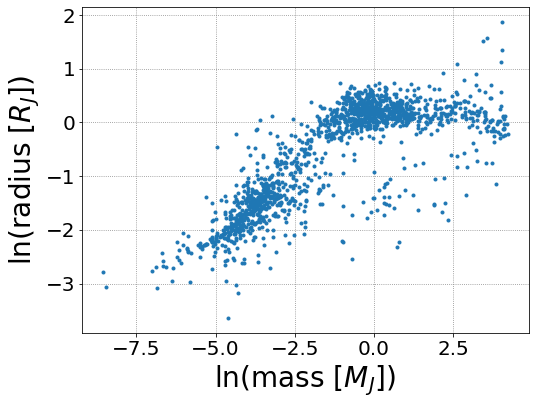

In [13]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log(data['mass']), np.log(data['radius']), marker = '.', linestyle='')
plt.xlabel("ln(mass [$M_J$])", fontsize=28)
plt.ylabel("ln(radius [$R_J$])", fontsize=28)

#plt.xlim(-300,600)
#plt.ylim(0,1.02)  
ax.tick_params(axis='both', which='major', labelsize=20)
plt.show()

**10. There is a known gap in the radius of planets. Can you find where this gap is in the plot from #9? Is there also a gap in the mass of planets? What does this suggest?** 

As it can be observed, the gap in the radius of the planets appears around -0.5, which implies ($\sim Exp[-0.5]$ $M_J$) because of the logaritmic scale. Also there is a gap in the mass of the planets, approximately around -2, which implies ($\sim Exp[-2]$ $M_J$) because of the logaritmic scale. 

**Falta incluir que sugiere ese gap**

**11. Is there anything else that you can conclude from #9? Mark where the gap is, you can use a square or a circle on the figure. Briefly explain your observation.**

There are two types of fitting in the plot, the first one is at left hand side of the gap and it has a diagonal increasing, and the second one at the right hand side of the gap and the concentration is an horizontal line like. 

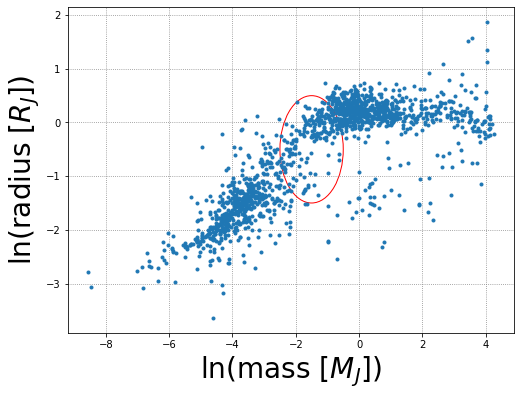

In [14]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(np.log(data['mass']), np.log(data['radius']), marker='.', linestyle='')
plt.xlabel("ln(mass [$M_J$])", fontsize=28)
plt.ylabel("ln(radius [$R_J$])", fontsize=28)

# Añadir círculo
# Coordenadas del centro del círculo
centro = (-1.5, -0.5)

# Radio del círculo
radio = 1

# Crear un círculo y agregarlo a los ejes
circulo = plt.Circle(centro, radio, edgecolor='r', facecolor='none')
ax.add_patch(circulo)

# Configurar los límites de los ejes
#ax.set_xlim(-2, 2)
#ax.set_ylim(-2, 2)

# Mostrar el gráfico
plt.show()


plt.show()

**12. Calcualte the density of the exoplanets and make a histogram. Compare the histogram with the density of Earth and Jupiter. What do you find?**


As we know, the density is defined as $\rho = \frac{M_{Planet}}{V_{Planet}}$ where $V_{Planet} = \frac{4}{3} \pi r^{3}$

In [15]:
#data.keys()

In [26]:
#Define the volume of the exoplanets based on the radius of the exoplanets
radius_array = data['radius']

volume_array = (4/3)*(np.pi)*(radius_array**3)

#Now, define the mass of the exoplanets:
mass_array = data['mass']

#Now, obtain the density of the exoplanets as array:

density_array = mass_array/volume_array
dens = data['mass']/((4/3)*(np.pi)*(data['radius']**3))
print(density_array)

0             NaN
1             NaN
2             NaN
3             NaN
4             NaN
          ...    
5538    21.225511
5539    53.248449
5540    15.472589
5541    17.462744
5542    52.758993
Length: 5543, dtype: float64


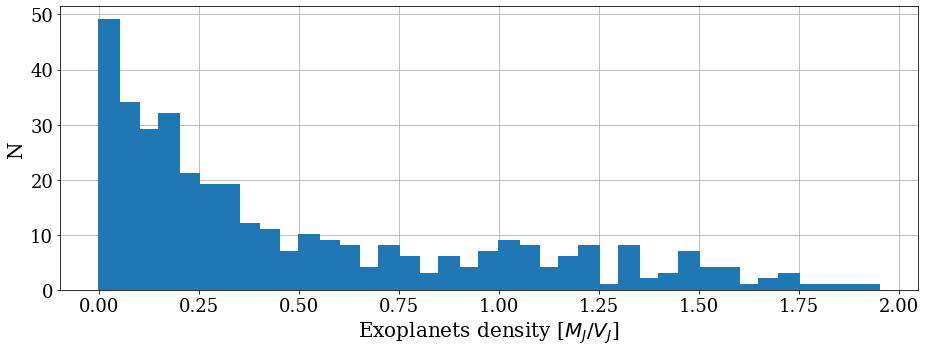

In [58]:
#Now, make the histogram:

fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,1,1)
d = np.log10(density_array)
bin_size = np.arange(0,2,0.05) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('Exoplanets density [$M_{J}/V_{J}$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
#plt.legend()
#plt.xlim(-2.5,2.5)
plt.tight_layout()

plt.show()

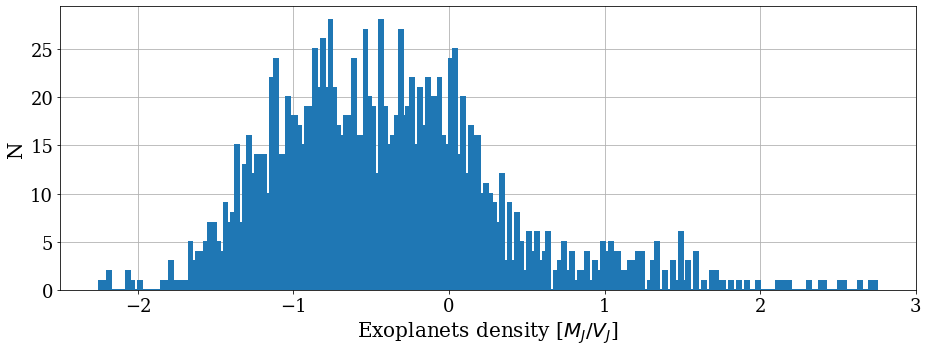

In [59]:
#Now, make the histogram:

fig = plt.figure(figsize=(13.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,1,1)
d = np.log10(density_array)
plt.hist(d, bins=200, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('Exoplanets density [$M_{J}/V_{J}$]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
#plt.legend()
#plt.xlim(-2.5,2.5)
plt.tight_layout()

plt.show()

**13. Where are planets found? Plot the on sky position (R.A. and Dec) of all known exoplanets. What can you conclude from this.** 

In [60]:
#data.keys()

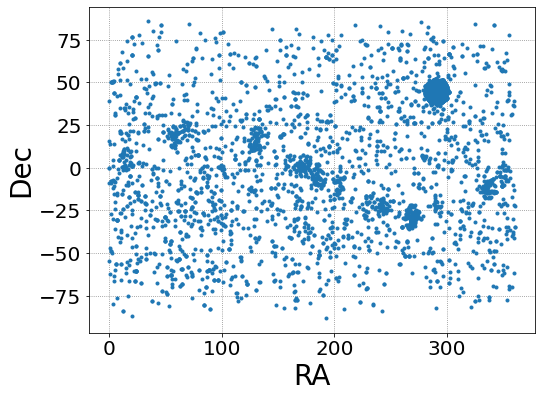

In [61]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['ra'], data['dec'], marker = '.', linestyle='')
plt.xlabel("RA", fontsize=28)
plt.ylabel('Dec', fontsize=28)

#plt.xlim(0.00,2500)
#plt.ylim(-0.1,3.5)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

We can conclude that there is concentrations at some points!

**14. Plot histograms of the host stars distance, mass and temperature.**

In [62]:
#data.keys()

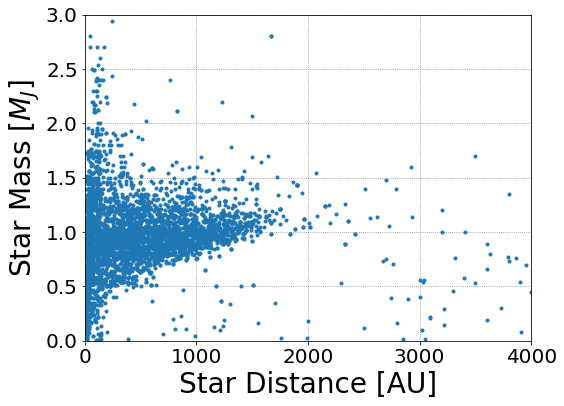

In [63]:
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111)
plt.grid(linestyle=':', color='grey')
plt.plot(data['star_distance'], data['star_mass'], marker = '.', linestyle='')
plt.xlabel("Star Distance [AU]", fontsize=28)
plt.ylabel('Star Mass [$M_J$]', fontsize=28)

plt.xlim(0.00,4000)
plt.ylim(0,3)  
ax.tick_params(axis='both', which='major', labelsize=20)
fig.savefig('./test.png', dpi=200)

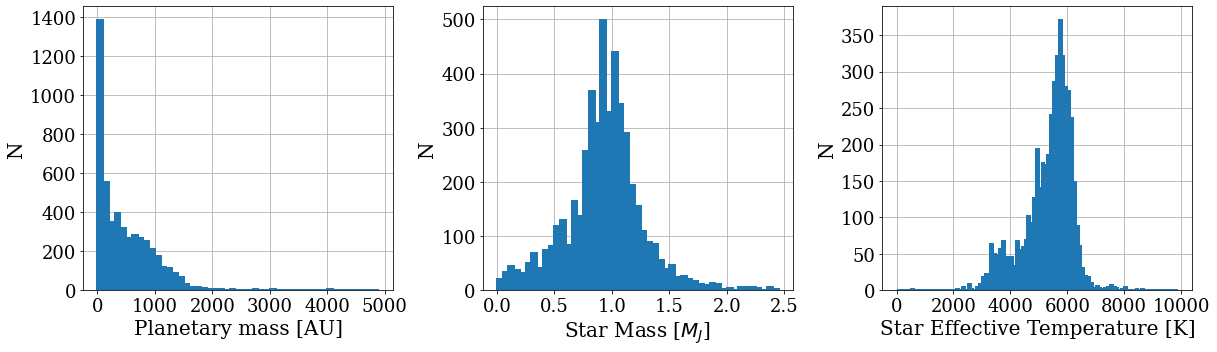

In [64]:
fig = plt.figure(figsize=(17.,5.))
plt.axes(frameon=False)
plt.xticks([])
plt.yticks([])

ax1 = fig.add_subplot(1,3,1)
d = data['star_distance']
bin_size = np.arange(0,5000,100) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(1/317.83, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax1.set_xlabel('Planetary mass [AU]', size=20,family='serif')
ax1.set_ylabel('N', size=20,family='serif')
plt.grid(True)
#plt.legend()
#plt.xlim(0.00,13)
plt.tight_layout()

ax2 = fig.add_subplot(1,3,2)
d = data['star_mass']
bin_size =np.arange(0,2.5, 0.05) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax2.set_xlabel('Star Mass [$M_J$]', size=20,family='serif')
ax2.set_ylabel('N', size=20,family='serif')
#plt.legend()
plt.grid(True)
#plt.xlim(0.00,2)
plt.tight_layout()

ax3 = fig.add_subplot(1,3,3)
d = data['star_teff']
bin_size = np.arange(0,10000, 100) 
plt.hist(d, bins=bin_size, histtype='step', color='C0', fill=True, linewidth=2)
#plt.axvline(0.0892147, color='C1', lw=4, label='Earth')
plt.xticks(family='serif',size=18)
plt.yticks(family='serif',size=18)
ax3.set_xlabel('Star Effective Temperature [K]', size=20,family='serif')
ax3.set_ylabel('N', size=20,family='serif')
#plt.legend()
plt.grid(True)
#plt.xlim(0.00,2)
plt.tight_layout()
plt.show()

**15. What can you conclude from the plots in #13? Are these conclusions physically meaningfull or the result of some bias?** 


## 2. (5 points) Finding Exoplanets in transit data 

The goal of this exercise is to analyse data from the Kepler satellite and identify planets with the transit method. 

1. Follow the tutorial and download data from the Kepler mission for the star: Kepler-23.
2. Prepare the data to search for planets, for this normalize the flux and remove the outliers.
3. Search for planets in the data. How many planets can you find in the dataset?
4. Make a plot of the folded lightcurve for all identified planets.
5. Include the model for all of the planets in the folded lightcurve plot. 

Tip: If you find more than one planet check if the periods that you found are not multiples of each other. 

**1. Follow the tutorial and download data from the Kepler mission for the star: Kepler-23.**

**Source: exoplanets-identifying-transiting-planet-signals.ipynb**

In [65]:
import lightkurve as lk
%matplotlib inline

In [66]:
# Search for Kepler observations of Kepler-69
search_result = lk.search_lightcurve('Kepler-23', author='Kepler', cadence='long')
# Download all available Kepler light curves
lc_collection = search_result.download_all()

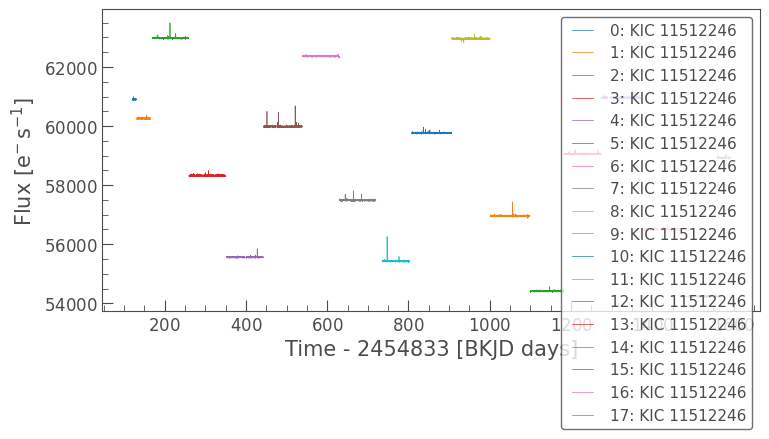

In [67]:
lc_collection.plot();

**2. Prepare the data to search for planets, for this normalize the flux and remove the outliers.**

Normalization and outlier remotion process

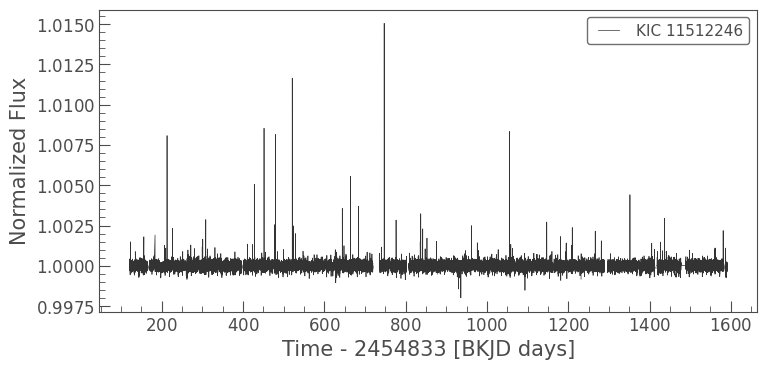

In [68]:
lc = lc_collection.stitch()
lc.plot();

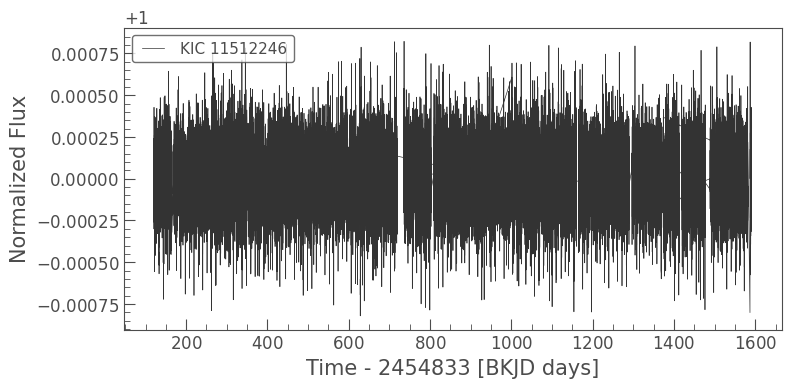

In [69]:
# Flatten the light curve 
lc = lc_collection.stitch().flatten(window_length=901).remove_outliers()
lc.plot();

**3. Search for planets in the data. How many planets can you find in the dataset?**

**How to identify planets in the data set?**

In [70]:
search_result

#,mission,year,author,exptime,target_name,distance
,,,,s,,arcsec
0,Kepler Quarter 00,2009,Kepler,1800,kplr011512246,0.0
1,Kepler Quarter 01,2009,Kepler,1800,kplr011512246,0.0
2,Kepler Quarter 02,2009,Kepler,1800,kplr011512246,0.0
3,Kepler Quarter 03,2009,Kepler,1800,kplr011512246,0.0
4,Kepler Quarter 04,2010,Kepler,1800,kplr011512246,0.0
5,Kepler Quarter 05,2010,Kepler,1800,kplr011512246,0.0
6,Kepler Quarter 06,2010,Kepler,1800,kplr011512246,0.0
7,Kepler Quarter 07,2010,Kepler,1800,kplr011512246,0.0
8,Kepler Quarter 10,2011,Kepler,1800,kplr011512246,0.0


**4. Make a plot of the folded lightcurve for all identified planets.**

**Planet b:** 

Period 1-20 days

In [94]:
import numpy as np
# Create array of periods to search
period = np.linspace(1, 20, 10000)
# Create a BLSPeriodogram
bls = lc.to_periodogram(method='bls', period=period, frequency_factor=500);
#bls.plot();

In [95]:
planet_b_period = bls.period_at_max_power
planet_b_t0 = bls.transit_time_at_max_power
planet_b_dur = bls.duration_at_max_power

# Check the value for period
print(planet_b_period)
print(planet_b_t0)
print(planet_b_dur)

10.742274227422742 d
122.55364229753526
0.25 d


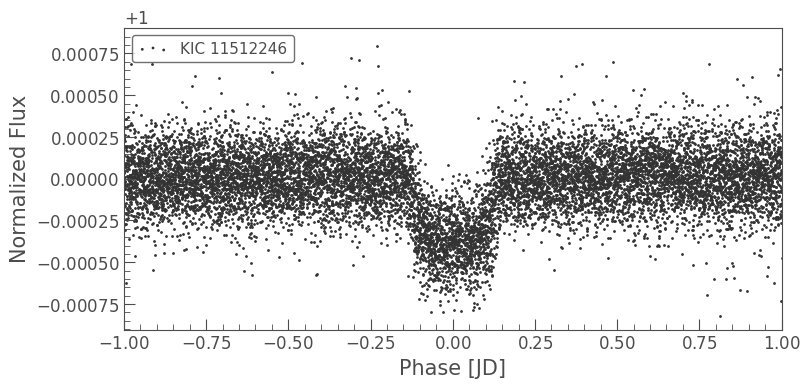

In [96]:
# Phase fold plot of the light curve i.e. folded lightcurve plot
ax = lc.fold(period=planet_b_period, epoch_time=planet_b_t0).scatter()
ax.set_xlim(-1, 1);

**5. Include the model for all of the planets in the folded lightcurve plot.**

**Planet b:** 

Period 1-20 days

In [97]:
# Create a BLS model using the BLS parameters
planet_b_model = bls.get_transit_model(period=planet_b_period, 
                                       transit_time=planet_b_t0, 
                                       duration=planet_b_dur)

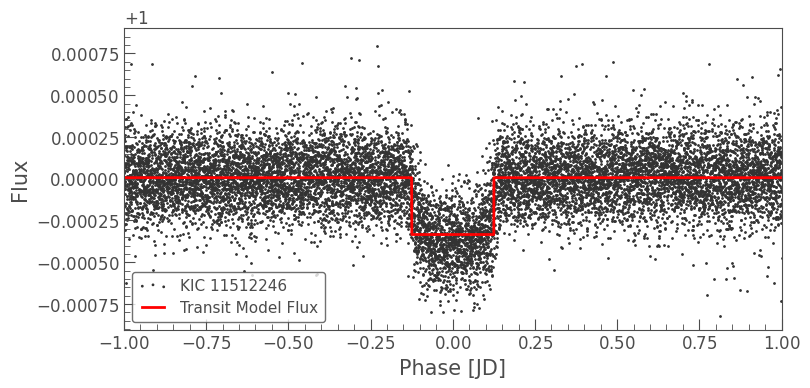

In [98]:
ax = lc.fold(planet_b_period, planet_b_t0).scatter()
planet_b_model.fold(planet_b_period, planet_b_t0).plot(ax=ax, c='r', lw=2)
ax.set_xlim(-1, 1);